In [2]:
# Project # 1 Jupyter Notebook
# Created by Melinda Eudy, Cameron Farquhar, Markita Francis, Luis Rojas, Kelly Rose.
# Project: 2017 Crime Data Used from several resources, UCR Crime Rates by County, US Census, and BJ Crime
# !pip install seaborn

In [3]:
# Dependencies and Setup *******Review before final presentation and remove what is not needed ************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date
from functools import reduce
import json
import ctypes
import seaborn as sns
import datetime

In [4]:
# Input File (CSV)
input_data_file = "output_data/merged_Crime.csv"

# Export file as a CSV
merged_Crime_df = pd.read_csv(input_data_file)
merged_Crime_df.reset_index(drop=True)

# Input File (CSV)
input_data_file = "output_data/Age_County.csv"

# Export file as a CSV
Age_County_df = pd.read_csv(input_data_file)
Age_County_df.reset_index(drop=True)

,crime_type,agency_name,county,state,state_name,latitude,longitude,age 0-9,age 10-19,age 20-29,age 30-39,age 40-49,age 50-59,age 60-69,age 70-79,age 80-89,age 90-Older,age Unknown,total_crimes
0,property-crime,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.421610,2,73,151,89,67,47,6,2,0,0,113,550
1,violent-crime,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.421610,2,32,30,14,4,3,0,0,0,0,20,105
2,property-crime,Laurel Police Department,SUSSEX,DE,Delaware,38.677511,-75.335495,1,27,58,24,9,5,1,3,1,0,42,171
3,violent-crime,Laurel Police Department,SUSSEX,DE,Delaware,38.677511,-75.335495,0,24,22,9,4,1,0,0,0,0,6,66
4,property-crime,Bridgeville Police Department,SUSSEX,DE,Delaware,38.744175,-75.599144,0,0,5,5,3,1,0,0,0,0,18,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,violent-crime,Grainger County Sheriff's Office,GRAINGER,TN,Tennessee,36.277463,-83.509493,0,7,5,11,8,4,2,1,0,0,0,38
11648,property-crime,Decatur County Sheriff's Office,DECATUR,TN,Tennessee,35.603422,-88.107384,0,0,8,16,7,1,2,0,0,0,18,52
11649,violent-crime,Decatur County Sheriff's Office,DECATUR,TN,Tennessee,35.603422,-88.107384,0,2,4,5,2,0,1,0,0,0,1,15
11650,property-crime,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.130090,0,5,6,30,11,1,0,0,0,0,17,70


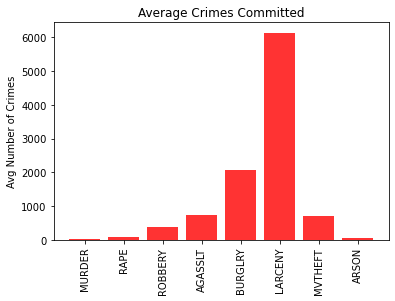

In [5]:
labels=['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']

crimes_type = merged_Crime_df[labels].mean()

x_axis = np.arange(len(crimes_type))
plt.bar(x_axis, crimes_type, color='r', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=labels,rotation = 90)

plt.title("Average Crimes Committed")

plt.ylabel("Avg Number of Crimes")
plt.savefig('output_data/Average_Crimes_bar.png')
plt.show()

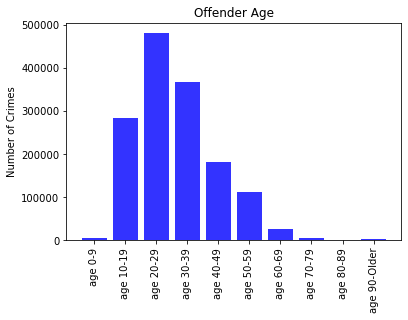

In [6]:
labels=['age 0-9', 'age 10-19', 'age 20-29','age 30-39', 'age 40-49', 
        'age 50-59', 'age 60-69', 'age 70-79','age 80-89', 'age 90-Older']
crimes_age = Age_County_df[labels].sum()
x_axis = np.arange(len(crimes_age))
plt.bar(x_axis, crimes_age, color='b', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, labels=labels,rotation = 90)

plt.title("Offender Age")

plt.ylabel("Number of Crimes")
plt.savefig('output_data/Age_Crimes_bar.png')
plt.show()

In [64]:
bins = [0, 5999, 11999, 17999, 23999, 29999, 35999, 41999, 47999, 53999, 59999]

group_labels = ["0 to $6k", "$6k to $12k", "$12k to $18k", "$18k to $24k", "$24k to $30k", "$30k to $36k",
                "$42k to $48k", "$48k to $54k", "$54k to $60k", "$60k and up"]

merged_Crime_df["Income Bin"] = pd.cut(merged_Crime_df['MEDIAN INCOME'], bins, labels=group_labels)

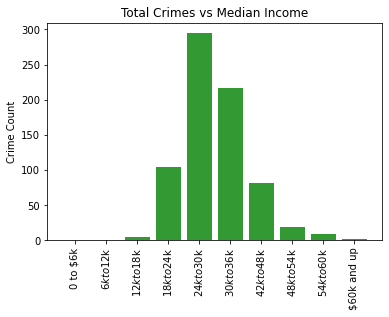

In [8]:
income_group = merged_Crime_df.groupby(["Income Bin"])
crime_group = income_group["TOTAL CRIMES"].count()

x_axis = np.arange(len(crime_group))
plt.bar(x_axis, crime_group, color='g', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
labels=["0 to $6k", "$6k to $12k", "$12k to $18k", "$18k to $24k", "$24k to $30k", "$30k to $36k",
                "$42k to $48k", "$48k to $54k", "$54k to $60k", "$60k and up"]
plt.xticks(tick_locations, labels=labels,rotation = 90)
plt.title("Total Crimes vs Median Income")
plt.ylabel("Crime Count")

plt.savefig('output_data/tot_crimes_v_age_bar.png')

plt.show()

In [9]:
df = crime_group.reset_index()
df

,Income Bin,TOTAL CRIMES
0,0 to $6k,0
1,$6k to $12k,0
2,$12k to $18k,4
3,$18k to $24k,104
4,$24k to $30k,295
5,$30k to $36k,216
6,$42k to $48k,81
7,$48k to $54k,18
8,$54k to $60k,8
9,$60k and up,1


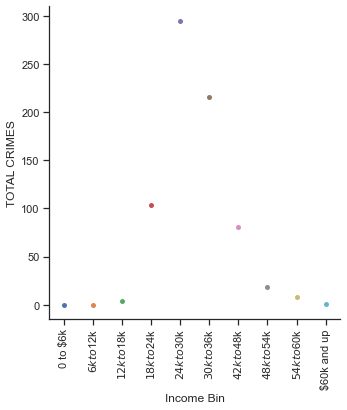

In [10]:
sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="Income Bin", y="TOTAL CRIMES", kind="swarm", data=df)
g.set_xticklabels(rotation=90)

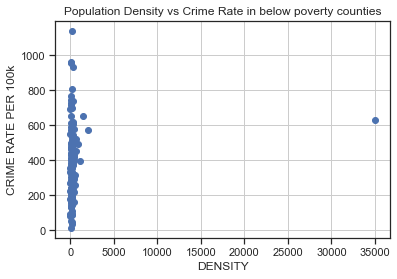

In [11]:
# Counties below poverty line = avg income
# 2017 poverty level for 4 person household was $24,600

below_poverty_df = merged_Crime_df.loc[merged_Crime_df['MEDIAN INCOME'] < 24600]
# Build a scatter plot
plt.scatter(below_poverty_df["DENSITY"], below_poverty_df["CRIME RATE PER 100k"], marker="o")
# Incorporate the other graph properties
plt.title("Population Density vs Crime Rate in below poverty counties")
plt.ylabel("CRIME RATE PER 100k")
plt.xlabel("DENSITY")
plt.grid(True)
# Save the figure
plt.savefig("output_data/density_crime_rate_below.png")
# Show plot
plt.show()

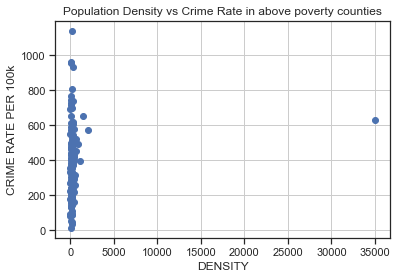

In [12]:
# Counties above poverty line = avg income
above_poverty_df = merged_Crime_df.loc[merged_Crime_df['MEDIAN INCOME'] >= 24600]
# Build a scatter plot
plt.scatter(below_poverty_df["DENSITY"], below_poverty_df["CRIME RATE PER 100k"], marker="o")
# Incorporate the other graph properties
plt.title("Population Density vs Crime Rate in above poverty counties")
plt.ylabel("CRIME RATE PER 100k")
plt.xlabel("DENSITY")
plt.grid(True)
# Save the figure
plt.savefig("output_data/density_crime_rate_above.png")
# Show plot
plt.show()

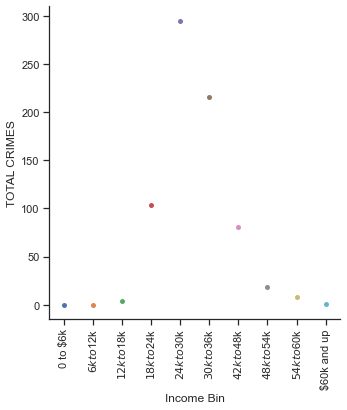

In [13]:
df = crime_group.reset_index()

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="Income Bin", y="TOTAL CRIMES", kind="swarm", data=df)
g.set_xticklabels(rotation=90)

In [14]:
Murder = merged_Crime_df["MURDER"].sum()
Rape = merged_Crime_df["RAPE"].sum()
Robbery = merged_Crime_df["ROBBERY"].sum()
Assault = merged_Crime_df["AGASSLT"].sum()
Burglary = merged_Crime_df["BURGLRY"].sum()
Larceny = merged_Crime_df["LARCENY"].sum()
Mvtheft = merged_Crime_df["MVTHEFT"].sum()
Arson = merged_Crime_df["ARSON"].sum()
total1 = merged_Crime_df["TOTAL CRIMES"].sum()
total2 = Murder + Rape + Robbery + Assault + Burglary + Larceny + Mvtheft + Arson
print(f"Total # of Murders: {Murder}")
print(f"Total # of Rapes: {Rape}")
print(f"Total # of Robbery: {Robbery}")
print(f"Total # of Assault: {Assault}")
print(f"Total # of Burglary: {Burglary}")
print(f"Total # of Larceny: {Larceny}")
print(f"Total # of Motor Vechicle Theft: {Mvtheft}")
print(f"Total # of Arson: {Arson}")
print(f"Total number of crimes: {total1}={total2}")

Total # of Murders: 10434.0
Total # of Rapes: 59431.0
Total # of Robbery: 270530.0
Total # of Assault: 543477.0
Total # of Burglary: 1513930.0
Total # of Larceny: 4466451.0
Total # of Motor Vechicle Theft: 513767.0
Total # of Arson: 38304.0
Total number of crimes: 7416324.0=7416324.0


In [15]:
#eliminate the outliers for crime and density 
quartiles = merged_Crime_df["MURDER"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [16]:
quartiles = merged_Crime_df["DENSITY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["MURDER"] > lower_bound_y) & (merged_Crime_df["MURDER"] < upper_bound_y)]

the r-value is: 0.32140149517936356
The correlation coefficient 0.32


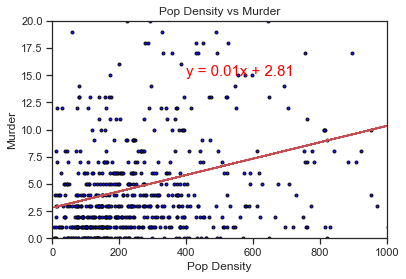

In [17]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["MURDER"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(400, 15), fontsize=15,color="red")

plt.title("Pop Density vs Murder")
plt.xlabel("Pop Density")
plt.ylabel("Murder")

plt.xlim(0, 1000)
plt.ylim(0, 20)
plt.savefig('output_data/dens_v_murder_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')
plt.show()

In [18]:
quartiles = merged_Crime_df["RAPE"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [19]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["RAPE"] > lower_bound_y) & (merged_Crime_df["RAPE"] < upper_bound_y)]

the r-value is: 0.2985481465889128
The correlation coefficient 0.3


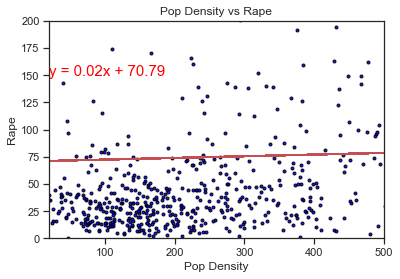

In [20]:
x_values = merged_Crime_df["DENSITY"]
y_values = merged_Crime_df["RAPE"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20, 150), fontsize=15,color="red")

plt.title("Pop Density vs Rape")
plt.xlabel("Pop Density")
plt.ylabel("Rape")

plt.xlim(20, 500)
plt.ylim(0, 200)

plt.savefig('output_data/dens_v_rape_scat.png')

print(f'the r-value is: {rvalue}')
print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [21]:
quartiles = merged_Crime_df["ROBBERY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [22]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["ROBBERY"] > lower_bound_y) & (merged_Crime_df["ROBBERY"] < upper_bound_y)]

the r-value is: 0.45177846543067596
The correlation coefficient 0.45


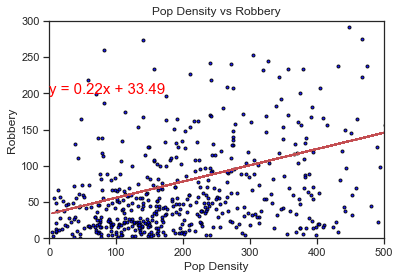

In [23]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["ROBBERY"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 200), fontsize=15,color="red")

plt.title("Pop Density vs Robbery")
plt.xlabel("Pop Density")
plt.ylabel("Robbery")

plt.xlim(0, 500)
plt.ylim(0, 300)
plt.savefig('output_data/dens_v_rob_scat.png')
print(f'the r-value is: {rvalue}')
print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [24]:
quartiles = merged_Crime_df["AGASSLT"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [25]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["AGASSLT"] > lower_bound_y) & (merged_Crime_df["AGASSLT"] < upper_bound_y)]

the r-value is: 0.4531149836156497
The correlation coefficient 0.45


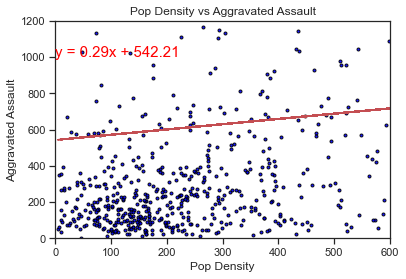

In [26]:
x_values = merged_Crime_df["DENSITY"]
y_values = merged_Crime_df["AGASSLT"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 1000), fontsize=15,color="red")

plt.title("Pop Density vs Aggravated Assault")
plt.xlabel("Pop Density")
plt.ylabel("Aggravated Assault")

plt.xlim(0, 600)
plt.ylim(0, 1200)

plt.savefig('output_data/dens_v_aslt_scat.png')


print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

the r-value is: 0.4241307213019233
The correlation coefficient 0.42


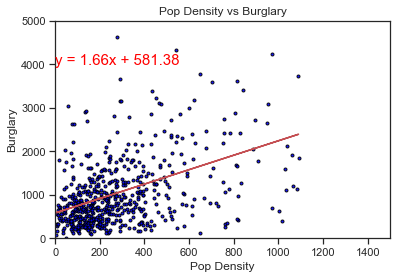

In [27]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["BURGLRY"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 4000), fontsize=15,color="red")

plt.title("Pop Density vs Burglary")
plt.xlabel("Pop Density")
plt.ylabel("Burglary")

plt.xlim(0, 1500)
plt.ylim(0, 5000)

plt.savefig('output_data/dens_v_burg_scat.png')


print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [28]:
quartiles = merged_Crime_df["LARCENY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [29]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["LARCENY"] > lower_bound_y) & (merged_Crime_df["LARCENY"] < upper_bound_y)]

the r-value is: 0.5459361914772198
The correlation coefficient 0.55


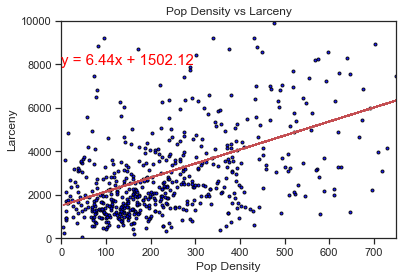

In [30]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["LARCENY"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 8000), fontsize=15,color="red")

plt.title("Pop Density vs Larceny")
plt.xlabel("Pop Density")
plt.ylabel("Larceny")

plt.xlim(0, 750)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_larc_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [31]:
quartiles = merged_Crime_df["MVTHEFT"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [32]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["MVTHEFT"] > lower_bound_y) & (merged_Crime_df["MVTHEFT"] < upper_bound_y)]

the r-value is: 0.4054271682690485
The correlation coefficient 0.41


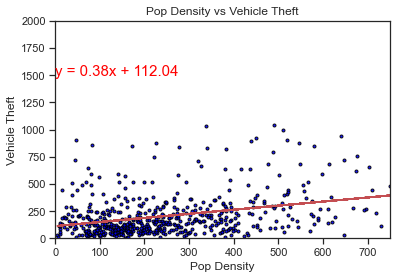

In [33]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["MVTHEFT"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 1500), fontsize=15,color="red")

plt.title("Pop Density vs Vehicle Theft")
plt.xlabel("Pop Density")
plt.ylabel("Vehicle Theft")

plt.xlim(0, 750)
plt.ylim(0, 2000)
plt.savefig('output_data/dens_v_vtheft_scat.png')
print(f'the r-value is: {rvalue}')
print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [34]:
quartiles = merged_Crime_df["ARSON"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [35]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["ARSON"] > lower_bound_y) & (merged_Crime_df["ARSON"] < upper_bound_y)]

the r-value is: 0.3794377097036437
The correlation coefficient 0.38


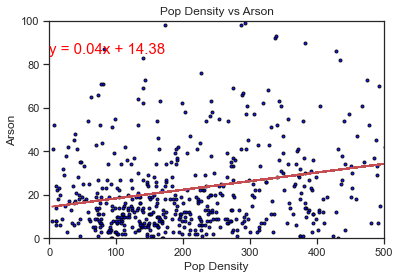

In [36]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["ARSON"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 85), fontsize=15,color="red")

plt.title("Pop Density vs Arson")
plt.xlabel("Pop Density")
plt.ylabel("Arson")

plt.xlim(0, 500)
plt.ylim(0, 100)
plt.savefig('output_data/dens_v_ars_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

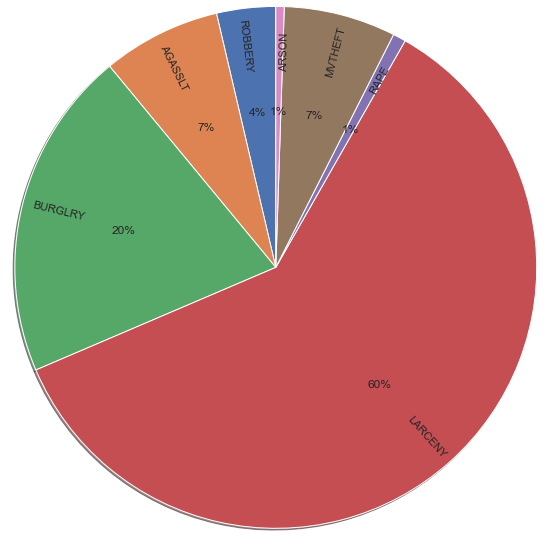

In [37]:
crimes_sum = merged_Crime_df[['ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY','RAPE', 'MVTHEFT', 'ARSON']].sum()
names = ['ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY','RAPE', 'MVTHEFT', 'ARSON']
explode = (0.0,0.0,0.0,0.0, 0.0, 0.0, 0.0)
plt.pie(crimes_sum, explode=explode, labels=names, radius=3,
        autopct="%1.0f%%", shadow=True, startangle=90,rotatelabels=90, pctdistance=0.6, labeldistance=.75)
# plt.axis("equal")
# plt.title("Crimes Committed")
plt.show()
# explode = (0.5,0.5,0.5,0.0, 0.5, 0.5, 0.5)

In [38]:
quartiles = merged_Crime_df["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)


# no_outlier_tot_crime = merged_Crime_df.loc[(merged_Crime_df["TOTAL CRIMES"] > lower_bound_y) & (merged_Crime_df["TOTAL CRIMES"] < upper_bound_y)]

In [39]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["TOTAL CRIMES"] > lower_bound_y) & (merged_Crime_df["TOTAL CRIMES"] < upper_bound_y)]

the r-value is: 0.5382246728500474
The correlation coefficient 0.54


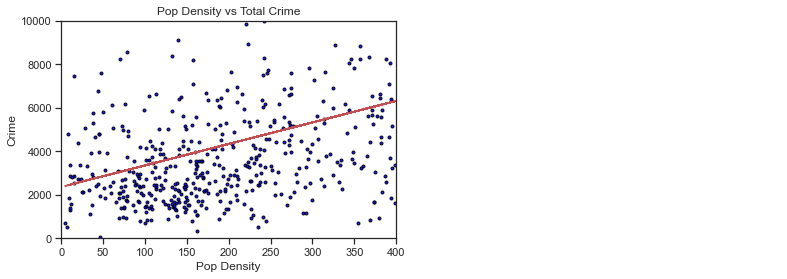

In [40]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["TOTAL CRIMES"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(700, 1000), fontsize=15,color="red")

plt.title("Pop Density vs Total Crime")
plt.xlabel("Pop Density")
plt.ylabel("Crime")

plt.xlim(0, 400)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_tot_scat.png')
print(f'the r-value is: {rvalue}')
print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [41]:
# 2017 poverty level for 4 person household was $24,600
below_pov = no_outlier_dens.loc[no_outlier_dens["MEDIAN INCOME"] < 24600]
above_pov = no_outlier_dens.loc[no_outlier_dens["MEDIAN INCOME"] >= 24600]

In [42]:
quartiles = below_pov["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [43]:
quartiles = below_pov["DENSITY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


no_outlier_dens = below_pov.loc[(below_pov["DENSITY"] > lower_bound) & (below_pov["DENSITY"] < upper_bound) & (below_pov["TOTAL CRIMES"] > lower_bound_y) & (below_pov["TOTAL CRIMES"] < upper_bound_y)]

the r-value is: 0.42814368005728054
The correlation coefficient 0.43


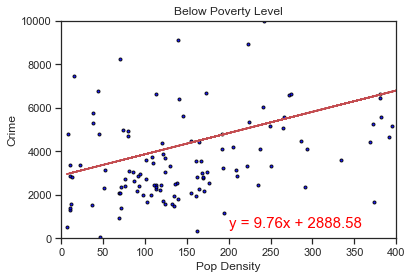

In [44]:
x_values = below_pov["DENSITY"]
y_values = below_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(200, 500), fontsize=15,color="red")

plt.title("Below Poverty Level")
plt.xlabel("Pop Density")
plt.ylabel("Crime")

plt.xlim(0, 400)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_tot_bpov_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [45]:
quartiles = above_pov["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [46]:
no_outlier_dens = above_pov.loc[(above_pov["DENSITY"] > lower_bound) & (above_pov["DENSITY"] < upper_bound) & (above_pov["MURDER"] > lower_bound_y) & (above_pov["MURDER"] < upper_bound_y)]

the r-value is: 0.5560637596330872
The correlation coefficient 0.56


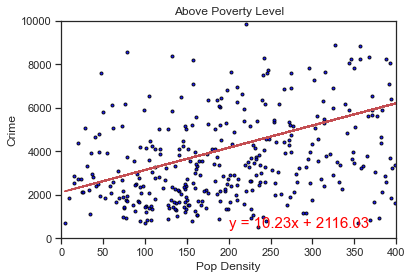

In [47]:
x_values = above_pov["DENSITY"]
y_values = above_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(200, 500), fontsize=15,color="red")

plt.title("Above Poverty Level")
plt.xlabel("Pop Density")
plt.ylabel("Crime")

plt.xlim(0, 400)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_tot_apov_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [48]:
#number of crimes committed above poverty level
ap = above_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)
crimes_ap = ap.sum()

#number of crimes committed below poverty level
bp = below_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)
crimes_bp = bp.sum()

pop_above = above_pov["POPULATION"].sum()

pop_below = below_pov["POPULATION"].sum()

perc_ab = (crimes_ap/pop_above)*100

perc_bel = (crimes_bp/pop_below)*100

print(f'{round(perc_bel,2)}% of the population in counties with median income below poverty level (4 person household) committed crimes')
print(f'{round(perc_ab,2)}% of the population in counties with median income above poverty level (4 person household) committed crimes')
print(f'That is a {round((((perc_bel/perc_ab) - 1) *100),2)}% increase in crime in counties that are below the poverty level')

3.82% of the population in counties with median income below poverty level (4 person household) committed crimes
2.86% of the population in counties with median income above poverty level (4 person household) committed crimes
That is a 33.8% increase in crime in counties that are below the poverty level


In [49]:
merged_Crime_df.columns

Index(['STATE', 'CODE', 'COUNTY', 'POPULATION', 'DENSITY', 'POP',
       'MEDIAN INCOME', 'CRIME RATE PER 100k', 'IDNO',
       'COUNTY POP - AGENCY REPORTING ARRESTS',
       'COUNTY POP - AGENCY REPORTING CRIME',
       '# COUNTY AGENCY REPORTING ARREST', '# COUNTY AGENCY REPORTING CRIME',
       'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT',
       'ARSON', 'TOTAL CRIMES', 'Income Bin'],
      dtype='object')

In [50]:
print(f'Max Density: {merged_Crime_df["DENSITY"].max()}')
print(f'Min Density: {merged_Crime_df["DENSITY"].min()}')

Max Density: 38182.23
Min Density: 4.33


In [51]:
dens_bins = [0, 29, 59, 89, 119, 149, 179, 209, 239, 269, 299, 329, 359, 389]

dens_labels = ["0 to 30", "30 to 60", "60 to 90", "90 to 120", "120 to 150", "180 to 210",
                "210 to 240", "240 to 270", "270 to 300", "300 to 330", "330 to 360", "360 to 390", "390 and up"]

merged_Crime_df['DENSITY BIN'] = pd.cut(merged_Crime_df['DENSITY'], dens_bins, labels=dens_labels)

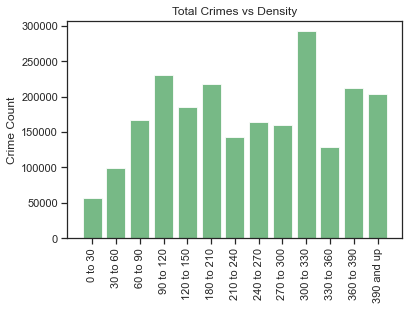

In [52]:
dens_group = merged_Crime_df.groupby(["DENSITY BIN"])
dens_crime_group = dens_group["TOTAL CRIMES"].sum()

x_axis = np.arange(len(dens_crime_group))
plt.bar(x_axis, dens_crime_group, color='g', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0 to 30", "30 to 60", "60 to 90", "90 to 120", "120 to 150", "180 to 210",
                "210 to 240", "240 to 270", "270 to 300", "300 to 330", "330 to 360", "360 to 390", "390 and up"],rotation = 90)

plt.title("Total Crimes vs Density")
# plt.xlabel("Crimes")
plt.ylabel("Crime Count")

plt.show()


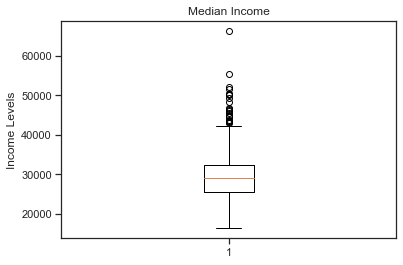

In [53]:
crime_total = merged_Crime_df["MEDIAN INCOME"]
fig1, ax1 = plt.subplots()
ax1.set_title('Median Income')
ax1.set_ylabel('Income Levels')
ax1.boxplot(crime_total)
plt.show()

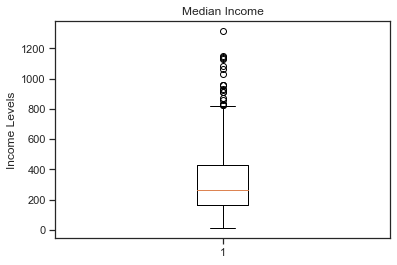

In [54]:
crime_total = merged_Crime_df["CRIME RATE PER 100k"]
fig1, ax1 = plt.subplots()
ax1.set_title('Median Income')
ax1.set_ylabel('Income Levels')
ax1.boxplot(crime_total)
plt.show()

In [55]:
quartiles = merged_Crime_df["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Total Crime is: {lowerq}")
print(f"The upper quartile of Total Crime is: {upperq}")
print(f"The interquartile range of Total Crime is: {iqr}")
print(f"The the median of Total Crime is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Total Crime is: 2520.75
The upper quartile of Total Crime is: 9909.25
The interquartile range of Total Crime is: 7388.5
The the median of Total Crime is: 4519.0 
Values below -8562.0 could be outliers.
Values above 20992.0 could be outliers.


In [56]:
upperq_tot_crime = merged_Crime_df.loc[merged_Crime_df["TOTAL CRIMES"] > upperq]
print(f'The average population density of counties that fall above the 75% quartile in crime is {round(upperq_tot_crime["DENSITY"].mean(),2)} people per square mile')

The average population density of counties that fall above the 75% quartile in crime is 1959.05 people per square mile


In [57]:
print(f'The national average population density is {round(merged_Crime_df["DENSITY"].mean(),2)} people per square mile')

The national average population density is 702.41 people per square mile


In [58]:
largest_dens = merged_Crime_df.nlargest(5, 'DENSITY')

print(f'The average amount of crimes committed in the top 5 most densily populated counties in the U.S. was {round(largest_dens["TOTAL CRIMES"].mean(),2)}, the national average was {round(merged_Crime_df["TOTAL CRIMES"].mean(),2)}')
largest_dens[["STATE","COUNTY"]]

The average amount of crimes committed in the top 5 most densily populated counties in the U.S. was 38228.8, the national average was 10187.26


,STATE,COUNTY
439,New York,Kings
500,New York,Bronx
340,New York,Queens
459,New Jersey,Hudson
242,Massachusetts,Suffolk


In [59]:
quartiles = merged_Crime_df["MEDIAN INCOME"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Median Income is: {lowerq}")
print(f"The upper quartile of Median Income is: {upperq}")
print(f"The interquartile range of Median Income is: {iqr}")
print(f"The the median of Median Income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Median Income is: 25582.5
The upper quartile of Median Income is: 32261.25
The interquartile range of Median Income is: 6678.75
The the median of Median Income is: 28925.5 
Values below 15564.375 could be outliers.
Values above 42279.375 could be outliers.


In [60]:
upperq_income = merged_Crime_df.loc[merged_Crime_df["MEDIAN INCOME"] > upperq]
print(f'The average total crimes in counties that fall above the 75% quartile in median income is {round(upperq_income["TOTAL CRIMES"].mean(),2)}')
print(f'The national average total crimes is {round(merged_Crime_df["TOTAL CRIMES"].mean(),2)} per county')

The average total crimes in counties that fall above the 75% quartile in median income is 10436.61
The national average total crimes is 10187.26 per county


In [63]:
richest = merged_Crime_df.nlargest(5, 'MEDIAN INCOME')

print(f'The average amount of crimes committed in the top 5 richest counties in the U.S. was {round(richest["TOTAL CRIMES"].mean(),2)}, the national average was {round(merged_Crime_df["TOTAL CRIMES"].mean(),2)}')
richest[["COUNTY", "STATE", "MEDIAN INCOME"]]

The average amount of crimes committed in the top 5 richest counties in the U.S. was 7194.8, the national average was 10187.26


,COUNTY,STATE,MEDIAN INCOME
516,Arlington,Virginia,66404.0
548,Loudoun,Virginia,55444.0
217,Howard,Maryland,52040.0
527,Fairfax,Virginia,51544.0
75,Douglas,Colorado,50367.0
